In [345]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [346]:
# Load data
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [347]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [348]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


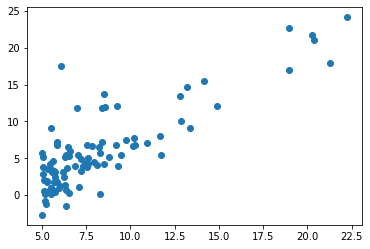

In [349]:
# Plot and analyze the data, where: x - population, y - profit
fig, ax  = plt.subplots()
ax.scatter(data['Population'], data['Profit'])

In [350]:
# Ex. 3 In order to make this cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.
d_len = len(data)
data.insert(0, "Ones", 1)
data.head()


,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [351]:
# Ex 4
X = data[['Ones', 'Population']]
y = data['Profit']


In [352]:
X_t = np.array(X.values)
y_t = np.array(y.values)
theta_t = np.array(np.array([0, 0]))

In [353]:
# Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

# def computeCost(X, y, theta):
#     inner = np.power((( theta@X.T) - y), 2)
#     return np.sum(inner) / (2*X.shape[0])

def computeCost(X, y, theta):
    m = len(y)

    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


In [354]:
test1 = computeCost(X_t, y_t, theta_t)
print(test1)

32.072733877455676


In [355]:
# Ex. 7 Please implement the gradient descent algorithm: the function returns optimized values θ and a vector of the cost function value for each iteration

# def simple_gradient(X, y, theta_t, alpha_t, it):
#     cost = 0
#     # m = X.shape[0]
#     m = len(X)
#     cost = []
#     for i in range(it):
#         # h = theta@X.T
#         # theta0_d = alpha * (1/m)*np.sum(h - y)
#         # theta1_d = alpha * (1/m)*np.sum(h - y)*X[:, 1].T
#         # theta[0] = theta[0] - theta0_d
#         # theta[1] = theta[1] - theta1_d
#         theta_t = theta_t - alpha_t*(np.transpose(X).dot(X.dot(theta_t)-y))/m
#         cost.append(computeCost(X, y, theta_t))
#     return theta, cost

# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

def simple_gradient(X, y, theta, alpha, it):
    m = len(y)
    cost_history = np.zeros(it)
    theta_history = np.zeros((it, 2))

    for i in range(it):
        prediction = np.dot(X, theta)
        theta = theta - (1/m)*alpha*(X.T.dot(prediction - y))
        theta_history[i, :] = theta.T
        cost_history[i] = computeCost(X, y, theta)
        # print(i, cost_history[i])
    return theta, cost_history

In [356]:
gradient = simple_gradient(X_t, y_t, theta_t, 0.01, 1500)

In [357]:
theta_best = np.linalg.inv(X_t.T.dot(X_t)).dot(X.T).dot(y_t)
theta_best

array([-3.89578088,  1.19303364])

In [358]:
theta0 = gradient[0][0]
theta1 = gradient[0][1]

y_pred = theta0 + theta1*X_t

(4.0, 23.0)

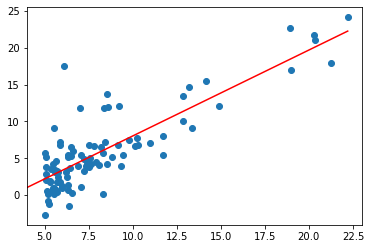

In [359]:
fig, ax = plt.subplots()
ax.scatter(X_t[:, 1], y_t)
# Działa ale nie wiem dlaczego wten sposób to plotować
# https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
ax.plot([np.min(X_t), np.max(X_t)], [np.min(y_pred), np.max(y_pred)], 'r-' )
ax.set_xlim(4, 23)

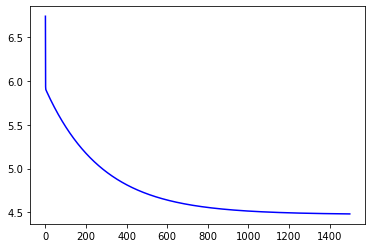

In [360]:
# Plot the relationship between the cost function and number of iterations.
fig, ax = plt.subplots()
ax.plot([i for i in range(0, 1500)], gradient[1], 'b-' )

In [361]:
path = os.getcwd() + '\\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [362]:
# # Standarize data using Standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data2)
# data21 = scaler.transform(data2)
# data21

In [363]:
# Standarize data using Standard scaler
data2["Size"] = (data2["Size"] - data2["Size"].mean())/data2["Size"].std()
data2["Bedrooms"] = (data2["Bedrooms"] - data2["Bedrooms"].mean())/data2["Bedrooms"].std()
data2["Price"] = (data2["Price"] - data2["Price"].mean())/data2["Price"].std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [364]:
# Ex 4
X_t2 = data2[["Size", "Bedrooms"]]
y_t2 = data2["Price"]
X_t2 = np.array(X_t2)
y_t2 = np.array(y_t2)
theta_t2 = np.array(np.array([0, 0]))
X_t2

array([[ 1.30009869e-01, -2.23675187e-01],
       [-5.04189838e-01, -2.23675187e-01],
       [ 5.02476364e-01, -2.23675187e-01],
       [-7.35723065e-01, -1.53776691e+00],
       [ 1.25747602e+00,  1.09041654e+00],
       [-1.97317285e-02,  1.09041654e+00],
       [-5.87239800e-01, -2.23675187e-01],
       [-7.21881404e-01, -2.23675187e-01],
       [-7.81023044e-01, -2.23675187e-01],
       [-6.37573110e-01, -2.23675187e-01],
       [-7.63567023e-02,  1.09041654e+00],
       [-8.56737193e-04, -2.23675187e-01],
       [-1.39273340e-01, -2.23675187e-01],
       [ 3.11729182e+00,  2.40450826e+00],
       [-9.21956312e-01, -2.23675187e-01],
       [ 3.76643089e-01,  1.09041654e+00],
       [-8.56523009e-01, -1.53776691e+00],
       [-9.62222960e-01, -2.23675187e-01],
       [ 7.65467909e-01,  1.09041654e+00],
       [ 1.29648433e+00,  1.09041654e+00],
       [-2.94048269e-01, -2.23675187e-01],
       [-1.41790005e-01, -1.53776691e+00],
       [-4.99156507e-01, -2.23675187e-01],
       [-4.

In [365]:
# gradient2D = simple_gradient(X_t2, y_t2, theta_t2, 0.01, 1500)
computeCost(X_t2, y_t2, theta_t2) # Działa

0.4893617021276595

In [366]:
gradient = simple_gradient(X_t2, y_t2, theta_t2, 0.01, 1500)

In [367]:
theta_best = np.linalg.inv(X_t2.T.dot(X_t2)).dot(X_t2.T).dot(y_t2)
theta_best

array([ 0.88476599, -0.05317882])

In [368]:
theta0 = gradient[0][0]
theta1 = gradient[0][1]

y_pred2 = theta0 + theta1*X_t

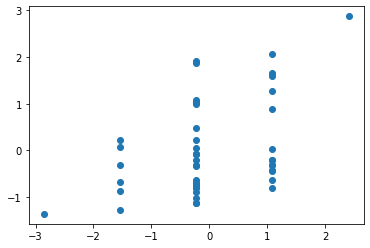

In [369]:
fig, ax = plt.subplots()
ax.scatter(X_t2[:, 1], y_t2)

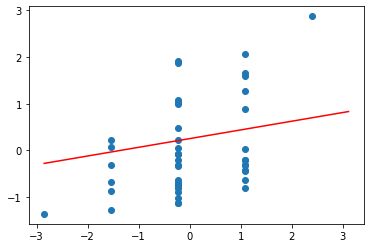

In [370]:
fig, ax = plt.subplots()
ax.scatter(X_t2[:, 1], y_t2)
# Działa ale nie wiem dlaczego wten sposób to plotować
# https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
# Dziwny wynik - sprawdzić czy StandardScaler dobrze zadziałał
ax.plot([np.min(X_t2), np.max(X_t2)], [np.min(y_pred2), np.max(y_pred2)], 'r-' )
# ax.set_xlim(4, 23)

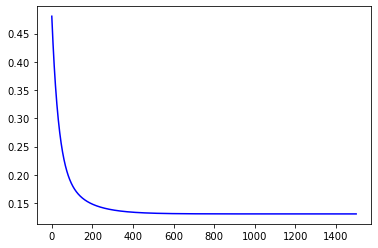

In [371]:
# Plot the relationship between the cost function and number of iterations.
fig, ax = plt.subplots()
ax.plot([i for i in range(0, 1500)], gradient[1], 'b-' )

# Linear regression - Python packages

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target
type(boston_Y)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

numpy.ndarray

In [373]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Data import
boston_X = boston.data
boston_Y = boston.target

boston_Y = boston_Y.reshape(-1, 1)

# Normalization

scaler = StandardScaler() 
boston_X = scaler.fit_transform(boston_X)
boston_Y = scaler.fit_transform(boston_Y)

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(
    boston_X, boston_Y, test_size=0.3, random_state=42
)

# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

r2_error = r2_score(Y_test, Y_predicted)
print(f"R2 error: {r2_error}")

Coefficients: 
 [[-0.12482724  0.09080594  0.0369402   0.08615968 -0.19424518  0.30995167
  -0.03311849 -0.31732929  0.2297995  -0.15946862 -0.21437007  0.11707405
  -0.42480435]]
Residual sum of squares: 0.254886962345226
R2 error: 0.7112260057484925


In [374]:
X_test.shape

(152, 13)

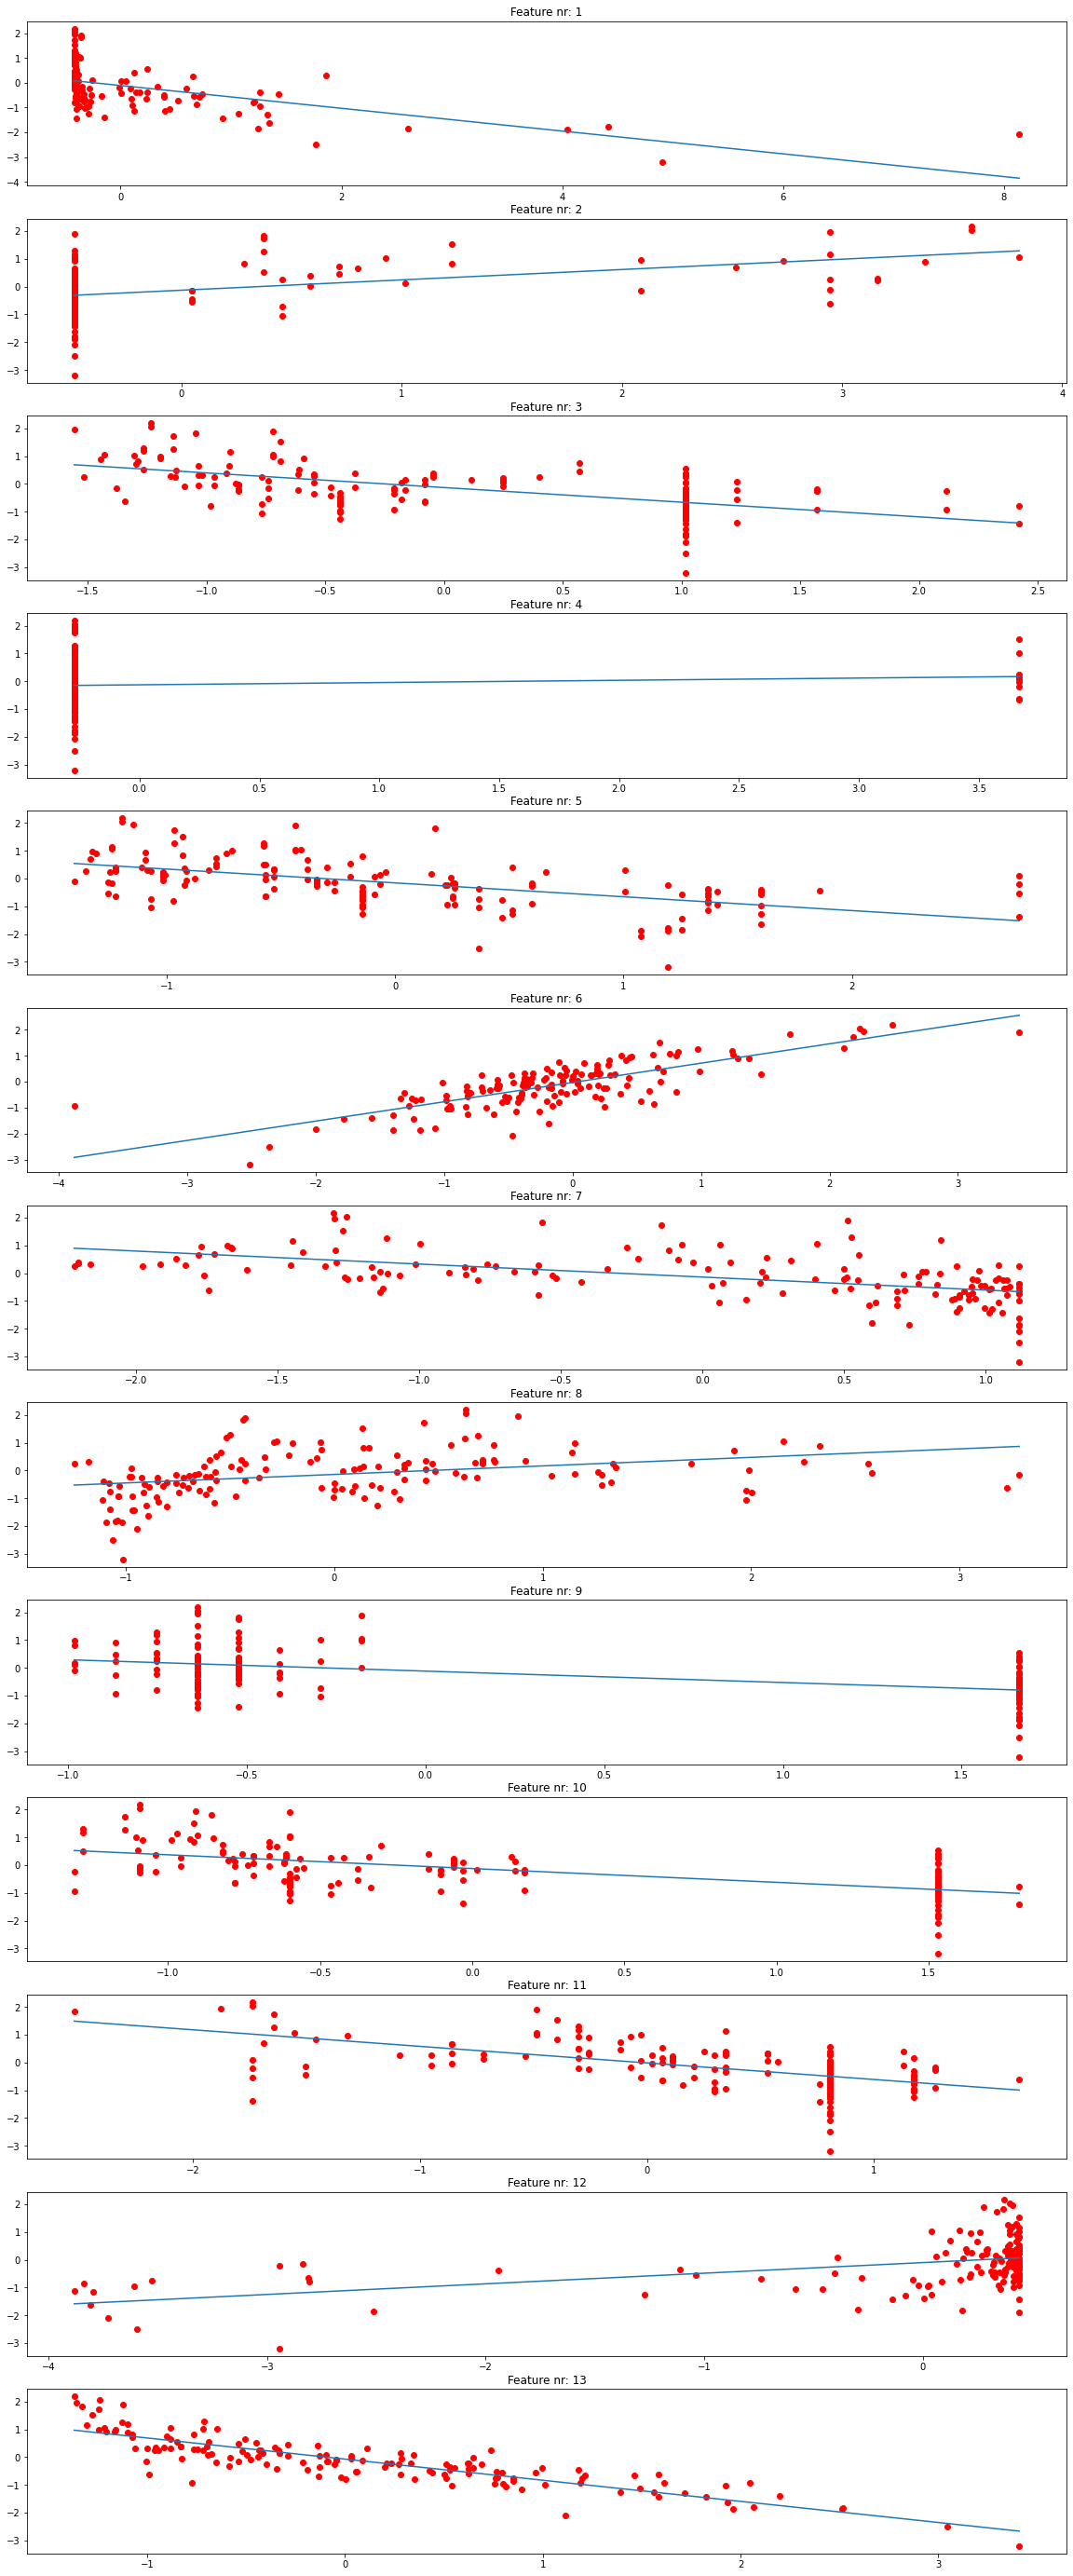

In [375]:
fig, ax = plt.subplots(13, 1)
fig.set_size_inches(20, 50)
for i in range(X_test.shape[1]):
    X = np.resize(X_test[:, i], (len(X_test[:, i]),))
    Y_predicted = np.resize(Y_predicted, (len(Y_predicted), ))
    ax[i].scatter(X, Y_predicted, color='red')
    ax[i].plot(np.unique(X), np.poly1d(np.polyfit(X, Y_predicted, 1))(np.unique(X)))
    ax[i].set_title(f"Feature nr: {i+1}")
plt.show()

